# <i>Breast cancer classification :</i> 
## <i>Predict whether the cancer is benign or malignant</i>

#### Author : 
<form action="https://www.linkedin.com/in/nassim-hmidou-334975b9/"> 
    <input type="submit" value="HMIDOU Nassim linkedin profile" />
</form>

<b>nassim.hmidou@gmail.com</b>

https://www.linkedin.com/in/nassim-hmidou-334975b9/

><b> Summary :</b>
- I) Project goal
- II) Import libraries
- III) Load data
- IV) Data analysis
- V) Data visualization
- VI) Feature selection
- VII) Parameter tuning

# I/ Project goal

>In this machine learning project, i am doing a simple binary classification task step by step.
I am going to detail the machine learning algorithm i use for a pedagogical purpose.

>In this problem i have to predict the stage of Breast Cancer M (Malignant) or B (Bengin) given some cell characteristics.

# II/ Import libraries

In [2]:
# -*- coding: utf-8 -*-
import os

# I import the libraries used for machine learning
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O, data manipulation as in SQL
import matplotlib.pyplot as plt # data visualization library  
import seaborn as sns # Another data visualization library  
%matplotlib inline

from sklearn.model_selection import train_test_split # to split data into train and test set
from sklearn.model_selection import KFold, cross_val_score # for K-fold cross validation
from sklearn.model_selection import GridSearchCV # for parameter tuning
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression # to apply Logistic regression
from sklearn.tree import DecisionTreeClassifier # Decision tree for classification
from sklearn.ensemble import RandomForestClassifier # for random forest classifier

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier #K-NN
from sklearn import svm # Support Vector Machine

# III/ Load data

>The dataset come from the Center for Machine Learning and Intelligent Systems :
https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

In [3]:
# I import the dataset as a pandas dataframe. It will help me to work easier.
data = pd.read_csv("C:\\Users\\dilan\\Desktop\\GitRepo\\Machine_learning_projects\\Breast_Cancer_classification\\data.csv",header=0)

# IV/ Data analysis

## a) Data description

>I first start by a simple data analysis on the data before going deeper into feature selection, extraction and classification.

In [4]:
data.head(2) # head() method by default show the 5 first dataset's row, i ask only for 2.
# data.tail(2)) would give me the last 2 row.

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN


In [5]:
# If i want to show the list of data feature, i can use .columns to give columns names 
# but i find more instructive to use .info to have more information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

><b><u>Description of dataset features :</u></b>
- There is 33 features in the dataset.
- As it is described from the dataset website, there is 10 real features : 
    - radius = mean of distances from center to points on the perimeter
    - texture = standard deviation of gray-scale values
    - perimeter
    - area
    - smoothness = local variation in radius lengths
    - compactness = (perimeter^2 / area - 1.0)
    - concavity = severity of concave portions of the contour
    - concave points = number of concave portions of the contour
    - symmetry
    - fractal dimension = ("coastline approximation" - 1)
- The 33 features can be divided into 3 parts since the 10 real features for each cell nucleus are computed for the :
    - Mean
    - Standard deviation
    - Worst
    
><b><u>What features should i drop ?</u></b>
- The first feature "id" is simply the cell identification number. It will not help me to classify the cells.
- The second feature "diagnosis" is our target (our class label, given it's a supervised learning classification task).
- The last feature is an empty feature, there is only NaN values. It will not help me to classify the cells.

## b)	Drop unusable features and map target feature

In [6]:
#I use the variables x and y to save the old dataset (i don't change it itself)

list = ['Unnamed: 32','id','diagnosis'] # features to drop
x = data.drop(list, axis=1) # axis 1 means i am droping the column
y = data.diagnosis # I set y as my target.

# As I said above the dataset features can be divided into 3 parts
features_mean = x.columns[0:10]
features_se = x.columns[10:20]
features_worst = x.columns[20:31]

# I map the diagnosis feature from an object type to an integer type to allow computation of basic statistics
y=y.map({'M':1,'B':0})

#print('First part : Features mean')
#print(features_mean)
#print('Second part : Features standard deviation')
#print(features_se)
#print('Third part : Features worst ')
#print(features_worst)

## c)	Descriptiv statistics

In [7]:
# this describe basic statistics of the features we kept
print(y.describe())
x.describe()

count    569.000000
mean       0.372583
std        0.483918
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: diagnosis, dtype: float64


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


>What i can see is that there is 569 observations in the dataset, so we will certainly don't have to take too much into account the computation speed aspect which is crucial with large dataset.

>I also see that i will need to normalize or standardize the features since there is some features with max value of 4254 (area_worst) and some others with max value of 0.222600 (smoothness_worst).

>This normalization will help us to increase the speed of a gradient descent (in gradient boosting per example) by setting features on a same scale. Even if it's not really a problem here given the dataset size, it's a good practice.

# V/ Data visualization

>In this part i am going to use different kind of plot to increase my comprehension of data. 

>I will plot features in 3 group (mean, se and worst), each group including 10 features to allow a better visualization.

>Before doing plots i will need to normalize or standardize data.

### a) Label feature histogram

>The descriptiv statistic give a 0.372583 mean for diagnosis, meaning that there is more begnin cancer than malignant in our dataset. We can vizualise it more easily with an histogram of the class label.

Number of Benign cancer :  357
Number of Malignant cancer :  212


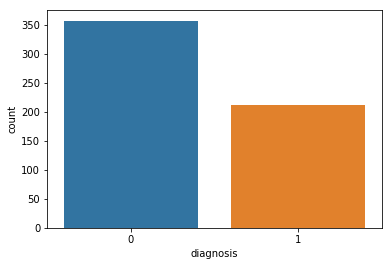

In [8]:
sns.countplot(y,label="Count");
B, M = y.value_counts()
print('Number of Benign cancer : ',B)
print('Number of Malignant cancer : ',M)

### a) violin plot

>The violin plots allow me to compare features in order to see which one is good for classification. I am going to show violin plot for each 3 groups of 10 features.

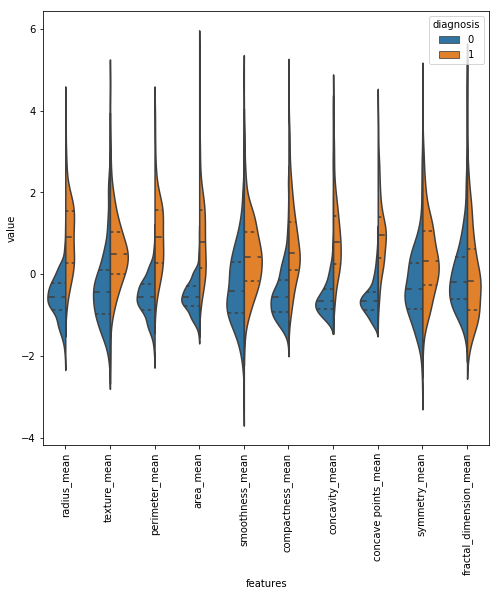

In [9]:
# first 10 features : features_mean
data_mean_std = (x[features_mean] - x[features_mean].mean()) / (x[features_mean].std()) # standardization of first 10 features

data_violon_mean = pd.concat([y,data_mean_std],axis=1)
data_violon_mean = pd.melt(data_violon_mean, id_vars="diagnosis", var_name="features", value_name='value')

plt.figure(figsize=(8,8))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data_violon_mean, split=True, inner="quart")
plt.xticks(rotation=90);

><b>Observation about features_mean group :</b> 
- texture_mean is a good feature for classification because it's medians of Malignant and Benign are well separated.
- Fractal_dimension_mean feature is not good for classification because it's medians of Malignant and Benign are very close so it doesn't help us to classify easily the observations in Malignant or Benign class.

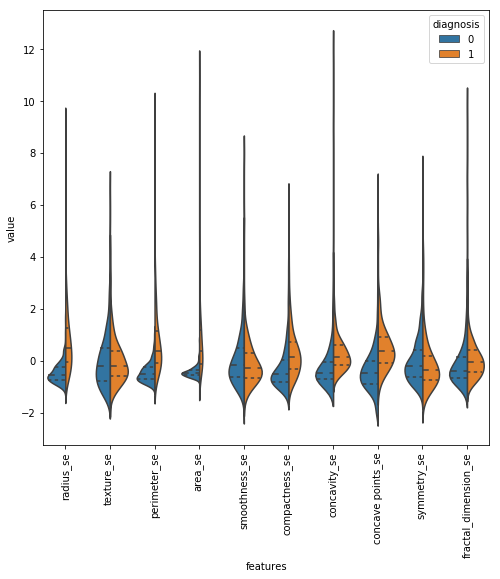

In [10]:
# Second 10 features : features_se
data_se_std = (x[features_se] - x[features_se].mean()) / (x[features_se].std()) # standardization of features 11-20

data_violon_se = pd.concat([y,data_se_std],axis=1)
data_violon_se = pd.melt(data_violon_se, id_vars="diagnosis", var_name="features", value_name='value')

plt.figure(figsize=(8,8))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data_violon_se, split=True, inner="quart");
plt.xticks(rotation=90);

><b>Observation about features_se group :</b> 
- concavity_se is a good feature for classification because it's medians of Malignant and Benign are well separated.
- smoothness_se feature is not good for classification, it's medians are really close.
- concavity_se and concave points_se seems to be similar, some other plots will show this relation more clearly.

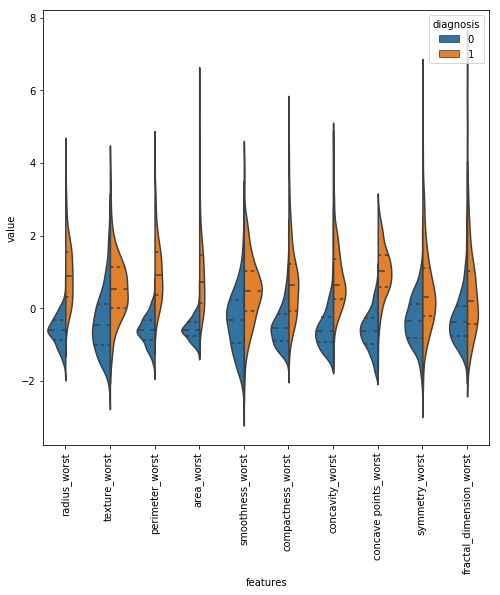

In [11]:
# third 10 features : features_worst
data_worst_std = (x[features_worst] - x[features_worst].mean()) / (x[features_worst].std()) # standardization of feature 20-31

data_violon_worst = pd.concat([y,data_worst_std],axis=1)
data_violon_worst = pd.melt(data_violon_worst, id_vars="diagnosis", var_name="features", value_name='value')

plt.figure(figsize=(8,8))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data_violon_worst, split=True, inner="quart");
plt.xticks(rotation=90);

><b>Observation about features_worst group :</b> 
- concavity_worst is a good feature for classification because it's medians of Malignant and Benign are well separated.
- symmetry_worst feature is not good for classification, it's medians are really close.
- radius_worst and perimeter_worst seems to be really similar, some other plots will show this relation more clearly.

### b) joint plot

>As i said above, some features seems to have a strong relation. If i want to explore deeper the relation between 2 features i can use joint plot because it shows me the relation between the features and compute the Pearson's r which range from −1 to 1 and that i can interpret as : 
- Pearson's r = 1 means a perfect positive linear relationship between the 2 features.
- Pearson's r = -1 means a perfect negative linear relationship between the 2 features.
- Pearson's r = 0 means that there is no linear correlation between the variables.

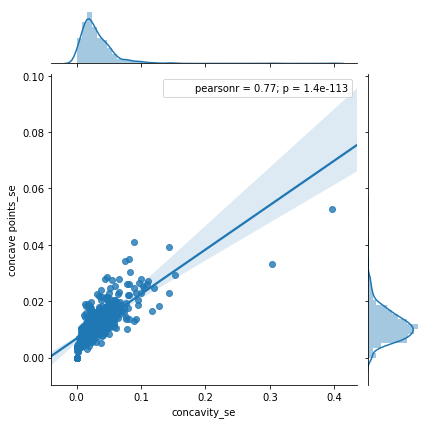

In [12]:
sns.jointplot(x.loc[:,'concavity_se'], x.loc[:,'concave points_se'], kind="regg");

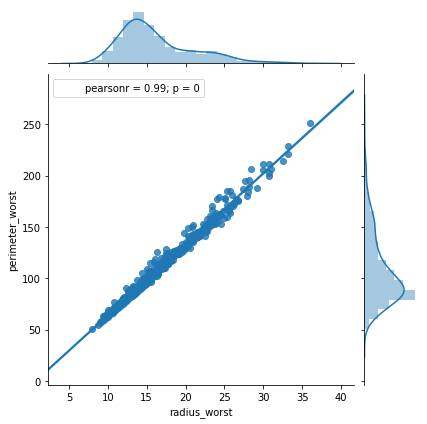

In [13]:
sns.jointplot(x.loc[:,'radius_worst'], x.loc[:,'perimeter_worst'], kind="regg");

>This two joint plot give me a better view of the correlation between the variables i expected to be really correlated through my violin plot analysis.

>The first joint plot give a Pearson's R of 0.77 which tell me that concavity_se and concave points_se are well correlated but not so much, so i will certainly keep the two features in my analysis.

>However, radius_worst and perimeter_worst are almost perfectly positively linearly correlated since the Pearson's R is 0.99. This help me for my future feature selection task because i will certainly only use one of the features and not both.

### c) pair grid

C:\Users\dilan\Anaconda3\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


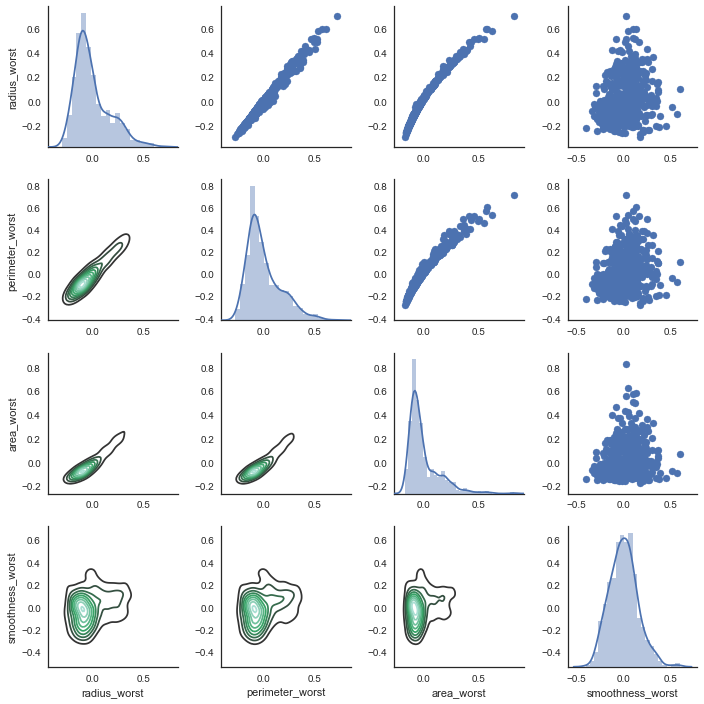

In [14]:
df = x.loc[:,['radius_worst','perimeter_worst','area_worst','smoothness_worst']]
df_N = (df-df.mean())/(df.max()-df.min()) # Feature scaling : Mean normalisation (another way)

sns.set(style="white")
g = sns.PairGrid(df_N, diag_sharey=False)

g.map_diag(sns.distplot)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot);

>Pair grid can give me other types of valuable graphs. In the example above, as with joint plot, i can see the linear correlation between some features and additionally i can see on the same graph the density of each feature and some contour plots.

### d) swarm plot

>I will not plot this for all 3 groups of features to avoid having too many graphs.

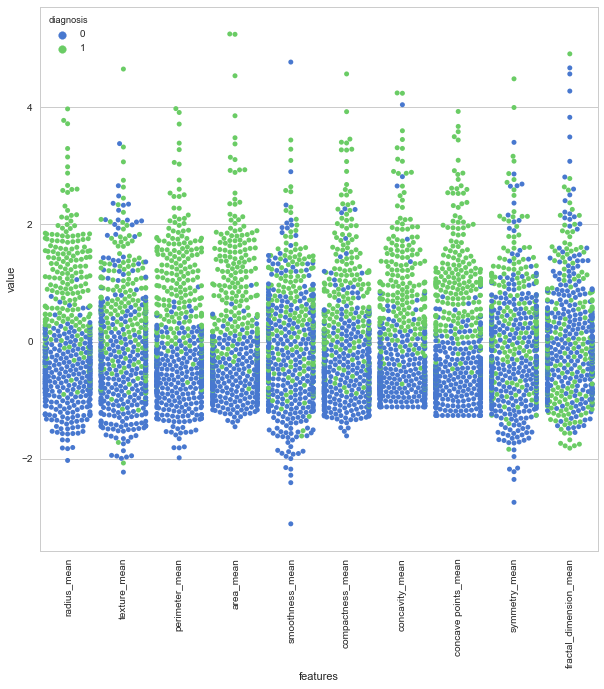

In [15]:
# Swarm plot on first 10 features : features_mean
data_swarm_mean = pd.concat([y,data_mean_std],axis=1)
data_swarm_mean = pd.melt(data_swarm_mean, id_vars="diagnosis", var_name="features", value_name='value')

sns.set(style="whitegrid", palette="muted")
plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data_swarm_mean)
plt.xticks(rotation=90);

>I think swarm plot is an interesting kind of graph since i can clearly see the variance and also which features will be a choice good for classification.

>Per example, for the first group of features above, i can see that area_mean seems to separate almost perfectly the two classes. In contrast, Symmetry_mean and fractal_dimension_mean perform really poorly in separation of the two classes.

### e) Scatter plot

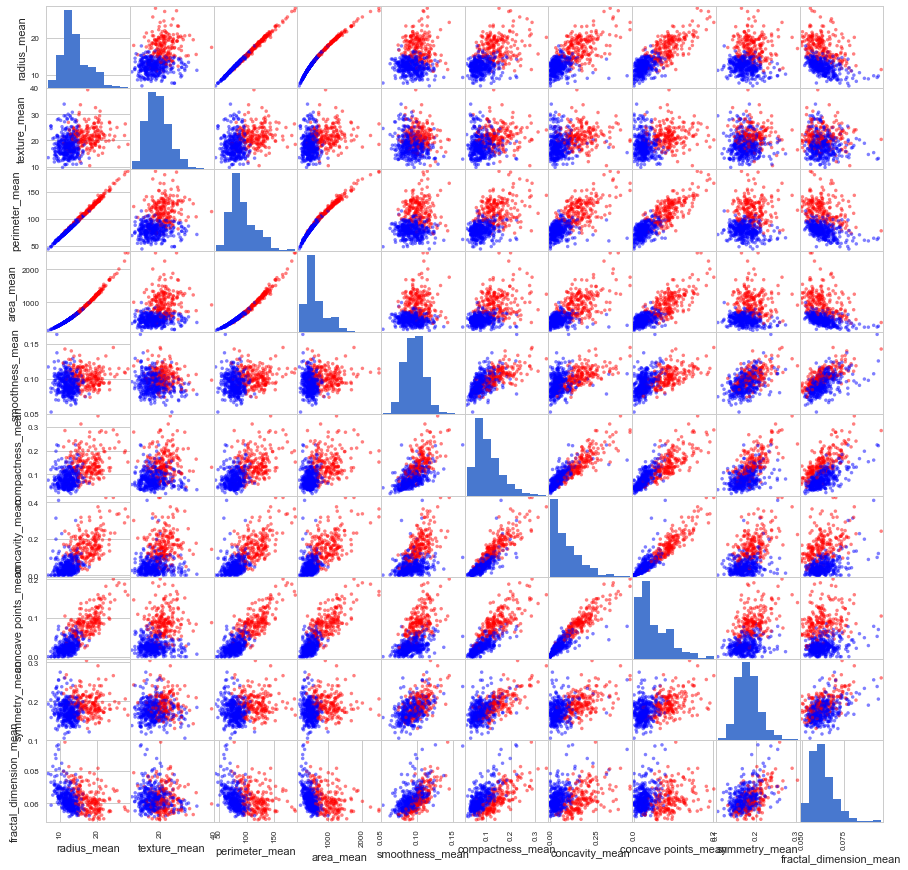

In [16]:
color_function = {0: "blue", 1: "red"} # Here Red color will be 1 which means Malignant and blue for 0 means Begnin
colors = y.map(lambda x: color_function.get(x)) # Mapping the color fuction with diagnosis column
pd.plotting.scatter_matrix(x[features_mean], c=colors, alpha = 0.5, figsize = (15, 15)); # plotting scatter plot matrix

> with swarm plot, scatter plot allows to clearly see correlation between features and which features will be a choice good for classification (variables which have a separable boundary between two class of cancer).
As for swarm plot, i only plot here for features_mean event if i have also done the two other plots on my own to do the data analysis.

><b>As with other plots :</b> 
- Radius, area and perimeter have a strong linear relationship.
- Texture_mean, smoothness_mean, symmetry_mean and fractal_dimension_mean aren't good for cancer classification since there is no separable plane between classes, they are mixed.

### f) heat map

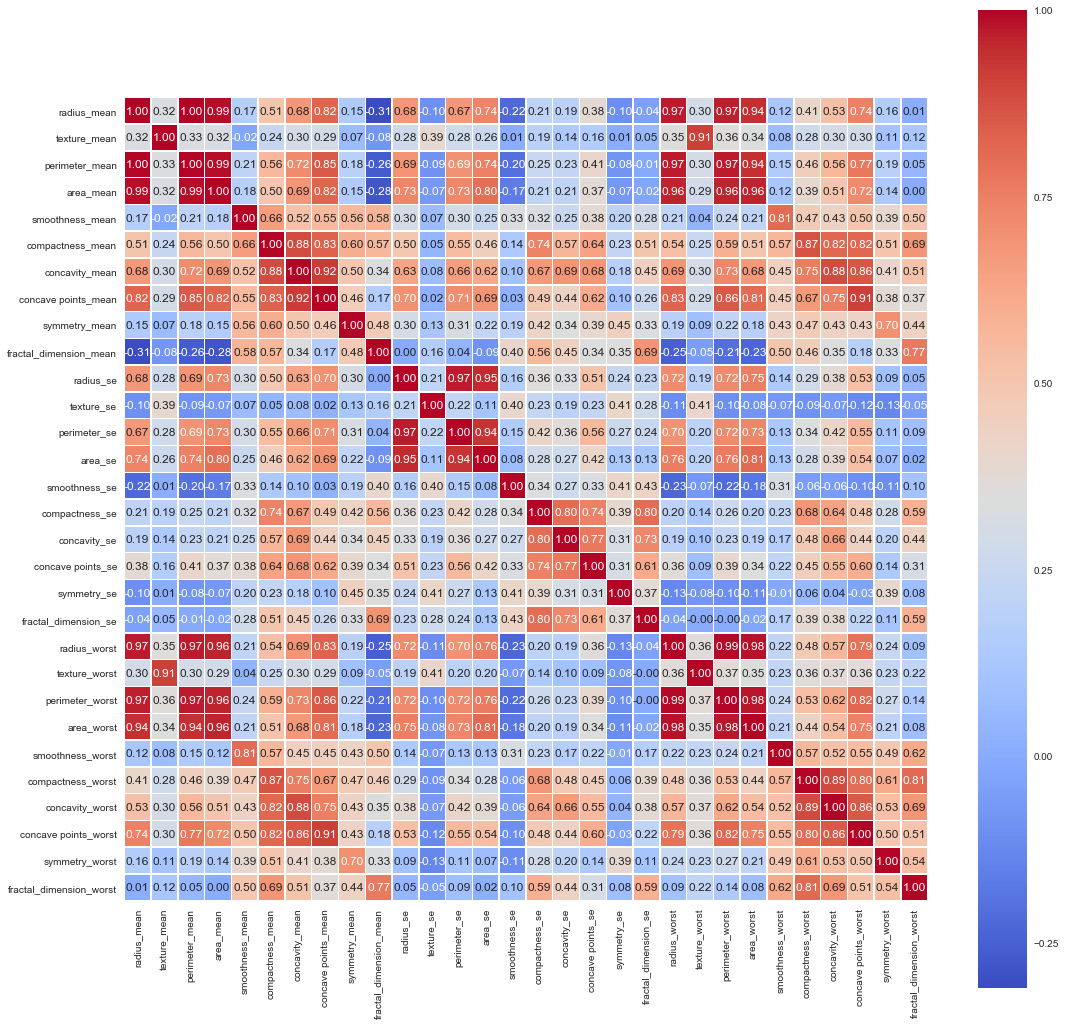

In [17]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(x.corr(), square=True, annot=True, linewidths=.5, fmt='.2f',ax=ax, cmap='coolwarm');

>Heatmap is a correlation matrix which allows to see correlation between all features (features depending on each other) within the same graph. This very powerful tool allow me to do some feature selection as i do in next section.

# VI/ Feature selection

>Dimensionality reduction is made in order to reduce the number of random variables we consider in our analysis. This field can be divided into feature selection and feature extraction. Here i am going to do feature selection (selection of a subset of the original dataset) instead of feature extraction (generating new features which are composites of the original features).

>Until now i have only observe data, now i am going to select features based on the previous observations with different methods :
>
    1) correlation
    2) univariate feature selection
    3) recursive feature elimination (RFE) 
    4) recursive feature elimination with cross validation (RFECV) 
    5) tree based feature selection. 

>In order to keep it simple, i am going to compare each of this feature selection method with the "Accuracy score" metric based on random forest classifier to have a common basis.

## 1) Before feature selection

>Before starting feature selection, i train several classifier models on original data to have a benchmark. It will be easier to compare models accuracy before and after feature selection.

In [18]:
# As we are going to use many models lets make a function Which we can use with different models
from sklearn.model_selection import KFold

def Classification_model_CV(model, name, data, target, **kwargs):
    """Function use to test classification accuracy of different models through K-Fold cross validation algorithm.
    - model : classification model use
    - name : model name
    - data : dataset use
    - target: label class to predict
    - Instead of kwargs, give one of this list : 
        - prediction_input : features to use for prediction
        - drop_features : features to drop"""
    
    # Standardize input dataset
    if 'prediction_features' in kwargs: #If i give the list of features to keep
        data_features_kept = (data[prediction_features] - data[prediction_features].mean()) / (data[prediction_features].std())
    elif 'drop_features' in kwargs: #if i give the list of features to drop
        data_drop_features = data.drop(drop_features,axis = 1 ) # I don't modify directly x (original dataset), to keep it if need it later 
        data_features_kept = (data_drop_features - data_drop_features.mean()) / (data_drop_features.std())
    else:
        data_features_kept = (data - data.mean()) / (data.std())
           
    # I split the dataset into train and test set
    global train_X
    #global train_X #I need this information outside of the function to print the number of features used        
    train_X, test_X, train_y, test_y = train_test_split(data_features_kept, target, test_size = 0.3, random_state = 42)
    # I set random_state because only pseudo-random number exist. This allows you to run the code and retrieve the same results .
    # I use 30% of dataset for test and 70% for train (rule of thumb)
    # train_X is the training data input 
    # train_y is the output of training data
    # test_X is the test data input 
    # test_y is the output of test data
    
    # Fit the model:
    model_accu = model.fit(train_X, train_y) #Here we fit the model using training set
    # Cancer prediction on testing set
    predictions = model_accu.predict(test_X)
    # Check the accuracy by comparing the predicted values and label data
    accuracy = metrics.accuracy_score(predictions, test_y)
    print("Accuracy of %s with train/test split method is : %s" % (name,"{0:.3%}".format(accuracy)))

    # K-fold Cross validation :
    kf = KFold(n_splits=10, random_state=42, shuffle=False) #n_splits is for number of folds
    global error
    error = []

    for train, test in kf.split(data_features_kept):
        # as the data is divided into train and test using KFold
        # now as explained above we have fit many models so here also we are going to fit model
        # in the cross validation the data in train and test will change for evry iteration
        train_X, test_X = np.array(data_features_kept)[train], np.array(data_features_kept)[test]
        train_y, test_y = np.array(target)[train], np.array(target)[test]
        model_cv = model.fit(train_X, train_y) # Training the algorithm using the predictors and target
        error.append(model_cv.score(test_X, test_y))

     # printing the 10 K-Fold cross validation accuracy
    print("Accuracy of %s with K-Fold Cross-Validation method is : %s" % (name,"{0:.3%}".format(np.mean(error))))
    print('------------------------------------------------------')

In [19]:
Classification_model_CV(RandomForestClassifier(n_estimators=100, random_state=42), "Random forest", x, y) # a simple random forest model of 100 trees
Classification_model_CV(svm.SVC(random_state=42), "Support vector machine", x, y)
Classification_model_CV(KNeighborsClassifier(), "K nearest neighbors", x, y)
Classification_model_CV(LogisticRegression(random_state = 42), "Logistic regression", x, y)

print('Number of features used : %s'%train_X.shape[1])

Accuracy of Random forest with train/test split method is : 97.076%
Accuracy of Random forest with K-Fold Cross-Validation method is : 95.965%
------------------------------------------------------
Accuracy of Support vector machine with train/test split method is : 97.076%
Accuracy of Support vector machine with K-Fold Cross-Validation method is : 97.359%
------------------------------------------------------
Accuracy of K nearest neighbors with train/test split method is : 95.906%
Accuracy of K nearest neighbors with K-Fold Cross-Validation method is : 96.660%
------------------------------------------------------
Accuracy of Logistic regression with train/test split method is : 98.246%
Accuracy of Logistic regression with K-Fold Cross-Validation method is : 97.541%
------------------------------------------------------
Number of features used : 30


>So here before any features selection, we have a pretty high accuracy (above 95% with any algorithm). Here i first use a simple train/test split method to compute accuracy on test set but to be really sure of my models accuracy, i use also a K-Fold cross validation method (with k=10, which is a common rule) in order to have no possible biais introduce by the pseudo-random split.

>In the next sections, i will use different methods of features selections. I will try to increase the accuracy of the model without overfit, but if i can't increase accuracy (which is highly profitable given the benchmark) i will at least try to reduce considerably the number of features used to achieve a high accuracy (Okham razor's rule, if i can achieve high accuracy with less features, the model is better).

## 2) Feature selection based on correlation

>First, i use correlation observation to proceed to feature selection. 

> <b>What i can observe from plots and heatmap above :</b>
- radius, perimeter and area in the 3 groups of features are highly correlated. It is useless to keep all this features so i decide to only keep area feature of each groups for the analysis.
- compactness, concavity and concave points are also highly correlated so i decide to only keep concave points of each groups for the analysis.

>Even if there is no best choice, my choices are based on swarm plot observations to choose features to keep. I can also observe that within each groups : 
- area_worst and area_mean are correlated, so i only use area_mean.
- texture_mean and texture_worst are correlated, so i only use texture_mean. 


><b>So the selected features in each groups are :</b>

>Mean                  | Standard deviation   | Worst                    
----------------------|----------------------|------------
area_mean             | area_se              | texture_worst
texture_mean          | texture_se           | smoothness_worst
smoothness_mean       | smoothness_se        | concave points_worst
concave points_mean   | concave points_se    | symmetry_worst
symmetry_mean         | symmetry_se          | fractal_dimension_worst
fractal_dimension_mean| fractal_dimension_se |
    
> With the new selection of features, there is no more highly correlated features as it can be seen on this heatmap.

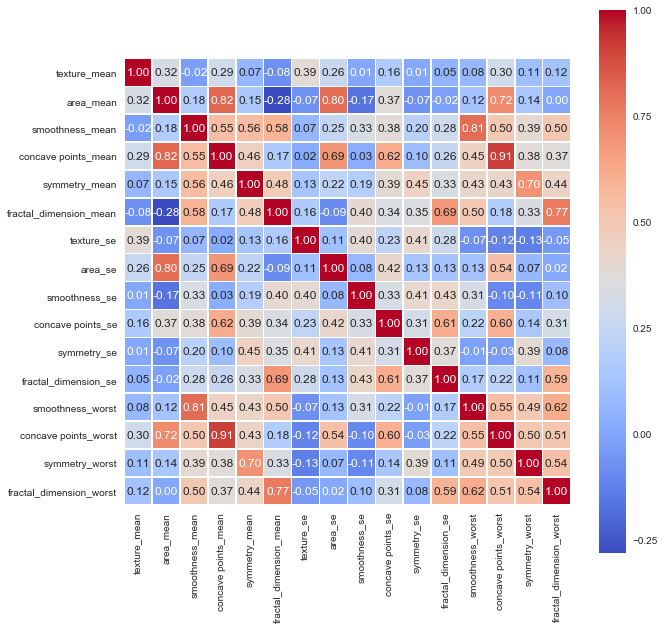

In [20]:
x_std = (x - x.mean()) / (x.std())

drop_list_corr = ['area_worst','perimeter_mean','perimeter_se','perimeter_worst','radius_mean','radius_se','radius_worst','compactness_mean','compactness_se','compactness_worst','concavity_mean','concavity_se','concavity_worst','texture_worst']
x_std_corr = x_std.drop(drop_list_corr,axis = 1 ) # I drop the features correlated

#correlation map
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(x_std_corr.corr(), square=True, annot=True, linewidths=.5, fmt='.2f',ax=ax, cmap='coolwarm');

> <b>So now i am computing models accuracy on non-correlated features : </b>

In [21]:
drop_features = drop_list_corr

Classification_model_CV(RandomForestClassifier(n_estimators=100, random_state=42), "Random forest", x, y, drop_features=drop_list_corr) # a simple random forest model of 100 trees
Classification_model_CV(svm.SVC(random_state=42), "Support vector machine", x, y, drop_features=drop_list_corr)
Classification_model_CV(KNeighborsClassifier(), "K nearest neighbors", x, y, drop_features=drop_list_corr)
Classification_model_CV(LogisticRegression(random_state = 42), "Logistic regression", x, y, drop_features=drop_list_corr)

print('Number of features used : %s'%train_X.shape[1])

Accuracy of Random forest with train/test split method is : 94.737%
Accuracy of Random forest with K-Fold Cross-Validation method is : 95.260%
------------------------------------------------------
Accuracy of Support vector machine with train/test split method is : 95.322%
Accuracy of Support vector machine with K-Fold Cross-Validation method is : 97.011%
------------------------------------------------------
Accuracy of K nearest neighbors with train/test split method is : 94.152%
Accuracy of K nearest neighbors with K-Fold Cross-Validation method is : 94.549%
------------------------------------------------------
Accuracy of Logistic regression with train/test split method is : 96.491%
Accuracy of Logistic regression with K-Fold Cross-Validation method is : 97.534%
------------------------------------------------------
Number of features used : 16


> So with only half of the features compare to the benchmark (16 selected features instead of the original 30 features), the accuracy is almost the same for each algorithm (only a 2% drop for KNN). 

> The accuracy is still pretty high with less features and can be sufficient for a lot of project, but i will see if i can do better with other features selection techniques.

> A more visual way to check the model accuracy, espacially for a binary classification problem, can be the confusion matrix and ROC curve.
With ROC curve i can visualize the performance of a binary classifier and AUC (area under the curve) summarize this performance with a number.

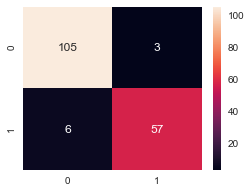

In [22]:
# I split the dataset into train and test set
train_X, test_X, train_y, test_y = train_test_split(x_std_corr, y, test_size = 0.3, random_state = 42)

# To plot the confusion matrix, i need to predict classes with a model. For simplicity i will only do this with random forest
RandomForest = RandomForestClassifier(n_estimators=100, random_state=42).fit(train_X, train_y) # Fitting the model

# Confusion matrix with random forest
confusion = confusion_matrix(test_y,RandomForest.predict(test_X))
f,ax = plt.subplots(figsize=(4, 3))
sns.heatmap(confusion,annot=True,fmt="d");

> The confusion matrix show me graphically that there few false positives (cells predict as Malignant given that it is begnin in reality) and few false negatives.

Populating the interactive namespace from numpy and matplotlib


C:\Users\dilan\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f', 'colors']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


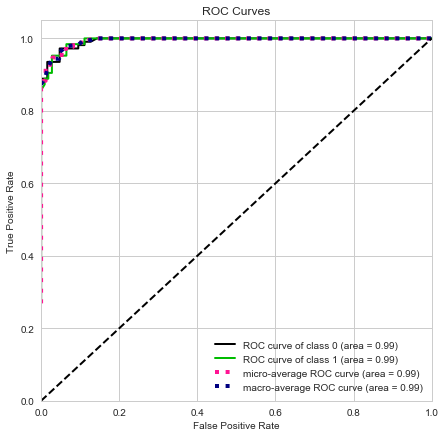

In [23]:
import scikitplot as skplt # Library to have better ROC plot than the one provide by matplotlib

%pylab inline
pylab.rcParams['figure.figsize'] = (7, 7)

predicted_probas = RandomForest.predict_proba(test_X)
skplt.metrics.plot_roc_curve(test_y, predicted_probas, cmap='nipy_spectral')
plt.show();

> The AUC is pretty high (almost 1 which is a perfect classifier), so it also tell me that the random forest is a very good (almost perfect) classifier for this problem.

## 3) Univariate feature selection

> With this univariate feature selection method, i will use SelectKBest to remove all features except the "k" highest scoring ones. The "k" stands for the number of features i want to keep. I first try with k=5.

In [24]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# I split the dataset into train and test set
train_X, test_X, train_y, test_y = train_test_split(x, y, test_size = 0.3, random_state = 42)

# find best scored 5 features
select_feature = SelectKBest(chi2, k=5).fit(train_X, train_y)

print('Score list:', select_feature.scores_)
print('Feature list:', train_X.columns)

Score list: [  1.77946492e+02   6.06916433e+01   1.34061092e+03   3.66899557e+04
   1.00015175e-01   3.41839493e+00   1.30547650e+01   7.09766457e+00
   1.95982847e-01   3.42575072e-04   2.45882967e+01   4.07131026e-02
   1.72696840e+02   6.12741067e+03   1.32470372e-03   3.74071521e-01
   6.92896719e-01   2.01587194e-01   1.39557806e-03   2.65927071e-03
   3.25782599e+02   1.16958562e+02   2.40512835e+03   7.50217341e+04
   2.63226314e-01   1.19077581e+01   2.58858117e+01   8.90751003e+00
   1.00635138e+00   1.23087347e-01]
Feature list: Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'are

> According to the univariate feature selection, if i apply it to all features, the 5 best feature for classification are : 

>5 Best Univariate correlated features|
----------------------|
area_mean             |
area_worst            |
area_se               |
perimeter_worst       | 
perimeter_mean        |

In [25]:
features_keep_univariate = ['area_worst','perimeter_mean','perimeter_worst','area_se','area_mean']
prediction_features = features_keep_univariate

Classification_model_CV(RandomForestClassifier(n_estimators=100, random_state=42), "Random forest", x, y, prediction_features=features_keep_univariate) # a simple random forest model of 100 trees
Classification_model_CV(svm.SVC(random_state=42), "Support vector machine", x, y, prediction_features=features_keep_univariate)
Classification_model_CV(KNeighborsClassifier(), "K nearest neighbors", x, y, prediction_features=features_keep_univariate)
Classification_model_CV(LogisticRegression(random_state = 42), "Logistic regression", x, y, prediction_features=features_keep_univariate)

print('Number of features used : %s'%train_X.shape[1])

Accuracy of Random forest with train/test split method is : 95.906%
Accuracy of Random forest with K-Fold Cross-Validation method is : 93.330%
------------------------------------------------------
Accuracy of Support vector machine with train/test split method is : 95.322%
Accuracy of Support vector machine with K-Fold Cross-Validation method is : 92.628%
------------------------------------------------------
Accuracy of K nearest neighbors with train/test split method is : 95.906%
Accuracy of K nearest neighbors with K-Fold Cross-Validation method is : 93.857%
------------------------------------------------------
Accuracy of Logistic regression with train/test split method is : 95.322%
Accuracy of Logistic regression with K-Fold Cross-Validation method is : 92.450%
------------------------------------------------------
Number of features used : 5


> Before making conclusion on the accuracy score, i run the algorithm on the uncorrelated dataset.

In [26]:
# I create the non-standardize uncorrelated dataset :
# I need only positiv numbers to apply SelectKBest, that's why i don't standardize
drop_list_corr = ['area_worst','perimeter_mean','perimeter_se','perimeter_worst','radius_mean','radius_se','radius_worst','compactness_mean','compactness_se','compactness_worst','concavity_mean','concavity_se','concavity_worst','texture_worst']
x_uncorr = x.drop(drop_list_corr,axis = 1 ) # I drop the features correlated

# I split the dataset into train and test set
train_X, test_X, train_y, test_y = train_test_split(x_uncorr, y, test_size = 0.3, random_state = 42)

# find best scored 5 features
select_feature = SelectKBest(chi2, k=5).fit(train_X, train_y)

print('Score list:', select_feature.scores_)
print('Feature list:', train_X.columns)

Score list: [  6.06916433e+01   3.66899557e+04   1.00015175e-01   7.09766457e+00
   1.95982847e-01   3.42575072e-04   4.07131026e-02   6.12741067e+03
   1.32470372e-03   2.01587194e-01   1.39557806e-03   2.65927071e-03
   2.63226314e-01   8.90751003e+00   1.00635138e+00   1.23087347e-01]
Feature list: Index(['texture_mean', 'area_mean', 'smoothness_mean', 'concave points_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 'area_se',
       'smoothness_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'smoothness_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


> According to the univariate feature selection, if i apply it to the 16 uncorrelated features, the 5 best feature for classification are :

>5 Best Univariate uncorrelated features |
----------------------|
area_mean             |
area_se               |
texture_mean          |
concave points_worst  | 
concave points_mean   |

In [27]:
features_keep_univariate2 = ['area_mean', 'area_se', 'texture_mean', 'concave points_worst', 'concave points_mean']
prediction_features = features_keep_univariate2

Classification_model_CV(RandomForestClassifier(n_estimators=100, random_state=42), "Random forest", x, y, prediction_features=features_keep_univariate2) # a simple random forest model of 100 trees
Classification_model_CV(svm.SVC(random_state=42), "Support vector machine", x, y, prediction_features=features_keep_univariate2)
Classification_model_CV(KNeighborsClassifier(), "K nearest neighbors", x, y, prediction_features=features_keep_univariate2)
Classification_model_CV(LogisticRegression(random_state = 42), "Logistic regression", x, y, prediction_features=features_keep_univariate2)

print('Number of features used : %s'%train_X.shape[1])

Accuracy of Random forest with train/test split method is : 95.322%
Accuracy of Random forest with K-Fold Cross-Validation method is : 95.263%
------------------------------------------------------
Accuracy of Support vector machine with train/test split method is : 97.076%
Accuracy of Support vector machine with K-Fold Cross-Validation method is : 95.251%
------------------------------------------------------
Accuracy of K nearest neighbors with train/test split method is : 94.152%
Accuracy of K nearest neighbors with K-Fold Cross-Validation method is : 94.549%
------------------------------------------------------
Accuracy of Logistic regression with train/test split method is : 96.491%
Accuracy of Logistic regression with K-Fold Cross-Validation method is : 95.426%
------------------------------------------------------
Number of features used : 5


> With this univariate features selection, accuracy results are pretty interesting.

> Indeed it confirm the simple feature selection i have made based on correlated features. Accuracy is higher for every algorithm if don't use correlated features to select the 5 best features.

> Given this, compare to the benchmark, i only loose few accuracy (1%) by using 5 features compare to 30.

## 4) Recursive feature elimination (RFE)

> Like with univariate feature selection, with RFE i will try to select the "k" best features and i choose k=5.

> With this RFE method, i need to use a classification model, here for simplicity i will only do this with random forest. The RFE method will assign weights to each features, then eliminate the smallest features by weights and do this recursivly until only 5 best features survive.

In [28]:
from sklearn.feature_selection import RFE

# I split the dataset into train and test set
train_X, test_X, train_y, test_y = train_test_split(x_uncorr, y, test_size = 0.3, random_state = 42)

# Create the RFE object and rank each pixel
clf_rf_3 = RandomForestClassifier(n_estimators=100, random_state = 42)      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=5, step=1)
rfe = rfe.fit(train_X, train_y)

print('Chosen best 5 feature by rfe:',train_X.columns[rfe.support_])

Chosen best 5 feature by rfe: Index(['texture_mean', 'area_mean', 'concave points_mean', 'area_se',
       'concave points_worst'],
      dtype='object')


> So with this recursive feature elimination method, the 5 best selected features are exactly the same that the ones selected with univariate method applied to non-correlated features. So it useless to compute model accuracy another time.

## 5) Recursive feature elimination with cross validation (RFECV)

> Until here, with Univariate method and RFE, i have choosen to select 5 best features, but this choice is a bit arbitrary even if it's a common pratice. 

> With RFECV, this algorithm is going to apply RFE method to select best features but i don't need to tell how many features do i want, the cross validation part of the algorithm is going to choose the optimal number of parameter to achieve the best accuracy withouth superfluous features.

Optimal number of features : 7
Best features : Index(['texture_mean', 'area_mean', 'concave points_mean', 'area_se',
       'smoothness_worst', 'concave points_worst', 'symmetry_worst'],
      dtype='object')


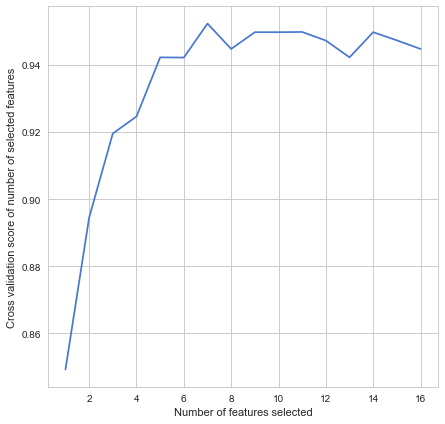

In [29]:
from sklearn.feature_selection import RFECV

# I split the dataset into train and test set
train_X, test_X, train_y, test_y = train_test_split(x_uncorr, y, test_size = 0.3, random_state = 42)

# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf_4 = RandomForestClassifier(n_estimators=100, random_state = 42)
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(train_X, train_y)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', train_X.columns[rfecv.support_])

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

> So the RFECV algorithm find that the best choice is 7 features. I plotted the graph to make this choice more understandable.
Indeed, i see that after 7 features, accuracy decrease so it's not necessary to include more features.

> According to this method, the 7 best feature for classification are :

>7 Best RFECV features |
----------------------|
texture_mean          |
area_mean             |
concave points_mean   |
area_se               |
smoothness_worst      |
concave points_worst  | 
symmetry_worst        |

In [30]:
features_keep_RFECV = ['texture_mean', 'area_mean', 'concave points_mean', 'area_se', 'smoothness_worst', 'concave points_worst', 'symmetry_worst']
prediction_features = features_keep_RFECV

Classification_model_CV(RandomForestClassifier(n_estimators=100, random_state=42), "Random forest", x, y, prediction_features=features_keep_RFECV) # a simple random forest model of 100 trees
Classification_model_CV(svm.SVC(random_state=42), "Support vector machine", x, y, prediction_features=features_keep_RFECV)
Classification_model_CV(KNeighborsClassifier(), "K nearest neighbors", x, y, prediction_features=features_keep_RFECV)
Classification_model_CV(LogisticRegression(random_state = 42), "Logistic regression", x, y, prediction_features=features_keep_RFECV)

print('Number of features used : %s'%train_X.shape[1])

Accuracy of Random forest with train/test split method is : 96.491%
Accuracy of Random forest with K-Fold Cross-Validation method is : 95.257%
------------------------------------------------------
Accuracy of Support vector machine with train/test split method is : 95.906%
Accuracy of Support vector machine with K-Fold Cross-Validation method is : 96.479%
------------------------------------------------------
Accuracy of K nearest neighbors with train/test split method is : 93.567%
Accuracy of K nearest neighbors with K-Fold Cross-Validation method is : 95.426%
------------------------------------------------------
Accuracy of Logistic regression with train/test split method is : 98.246%
Accuracy of Logistic regression with K-Fold Cross-Validation method is : 96.476%
------------------------------------------------------
Number of features used : 7


> With RFECV features selection, accuracy increase approximatly of 1% compare to the results with univariate method.

> Accuracy scores are still under the benchmark but pretty close given that i use only 7 features compare to 30.

## 6) Tree based feature selection

> With tree based feature selection method, i use the "feature importances" attribute of random forest classifier to select the more important features.

Feature ranking:
1. feature 3 (0.360546)
2. feature 13 (0.217293)
3. feature 1 (0.135343)
4. feature 7 (0.126686)
5. feature 0 (0.029813)
6. feature 11 (0.027448)
7. feature 8 (0.019260)
8. feature 14 (0.017208)
9. feature 12 (0.016058)
10. feature 5 (0.010588)
11. feature 10 (0.009332)
12. feature 6 (0.008687)
13. feature 9 (0.008528)
14. feature 15 (0.005794)
15. feature 2 (0.004834)
16. feature 4 (0.002583)


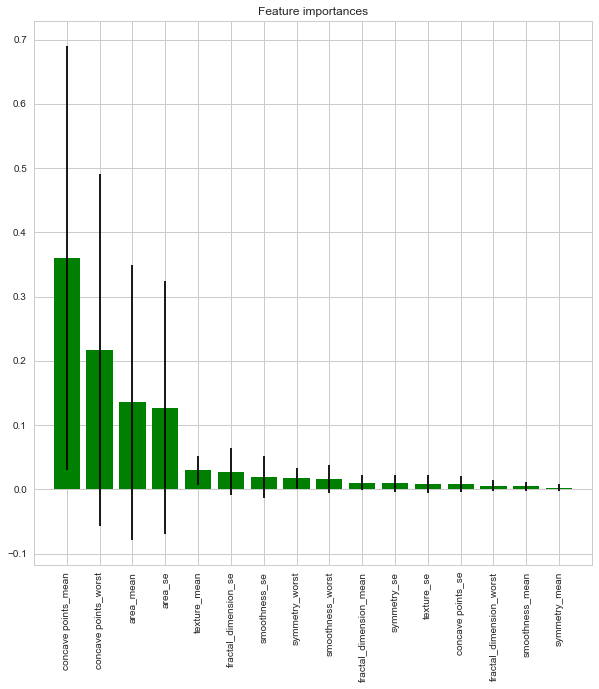

In [31]:
# I split the dataset into train and test set
# I use as usual uncorrelated features dataset and here it's necessary because for this feature selection method,
# there should not be any correlated features.
train_X, test_X, train_y, test_y = train_test_split(x_uncorr, y, test_size = 0.3, random_state = 42)

clf_rf_5 = RandomForestClassifier()      
clr_rf_5 = clf_rf_5.fit(train_X,train_y)
importances = clr_rf_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in clr_rf_5.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(train_X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(10, 10))
plt.title("Feature importances")
plt.bar(range(train_X.shape[1]), importances[indices], color="g", yerr=std[indices], align="center")
plt.xticks(range(train_X.shape[1]), train_X.columns[indices],rotation=90)
plt.xlim([-1, train_X.shape[1]])
plt.show()

> So with this tree based method, i just confirm what the RFECV algorithm conclude. After 7 features we see on the histogram that the features importance decrease and the 7 first features are exactly the same of the RFECV method.

## 7) Principal component analysis

> Before going to the tuning parameter part, i use Principle Component Analysis (PCA) on normalized data to increase performance of the algorithm.

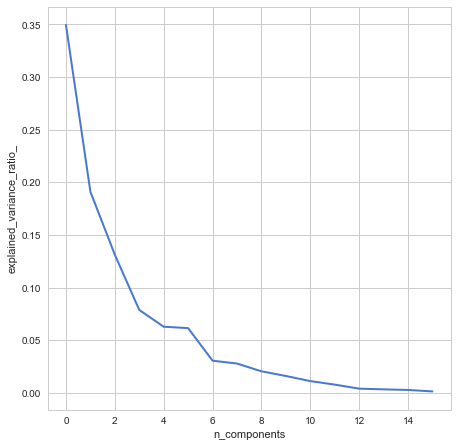

In [32]:
from sklearn.decomposition import PCA

# I split the dataset into train and test set : I use uncorrelated normalized features
train_X, test_X, train_y, test_y = train_test_split(x_std_corr, y, test_size = 0.3, random_state = 42)

pca = PCA()
pca.fit(train_X)

plt.figure(1, figsize=(8, 8))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_');

> According to PCA method variance ratio, i can choose approximatly 6-7 components.

> So to finish this part, i can say that with some simple visualization and feature selection methods, i have achieved to have an accuracy of ~96% with only 5 or 7 features given the 33 original features given by the dataset.

# VII/ Parameter tuning

> Finally, the features i will use are the 7 selected by RFECV :

>7 Best RFECV features |
----------------------|
texture_mean          |
area_mean             |
concave points_mean   |
area_se               |
smoothness_worst      |
concave points_worst  | 
symmetry_worst        |

> So now, after doing some feature selection, I will do parameter tuning of the models used precedently by using gridSearchCV.

## 1) GridSearchCV function

In [33]:
def Classification_model_gridsearchCV(model, name, data, target, param_grid, **kwargs):
    """Function use to tune parameters of the different classification models i use for predictions.
    - model : Classification model use
    - name : Model name
    - data : Dataset use
    - target: Label class to predict
    - param_grid : Parameter to tune with their options
    - Instead of kwargs, give one of this list : 
        - prediction_input : features to use for prediction
        - drop_features : features to drop"""
    
    # Standardize input dataset
    if 'prediction_features' in kwargs: #If i give the list of features to keep
        data_features_kept = (data[prediction_features] - data[prediction_features].mean()) / (data[prediction_features].std())
    elif 'drop_features' in kwargs: #if i give the list of features to drop
        data_drop_features = data.drop(drop_features,axis = 1 ) # I don't modify directly x (original dataset), to keep it if need it later 
        data_features_kept = (data_drop_features - data_drop_features.mean()) / (data_drop_features.std())
           
    # I split the dataset into train and test set
    #global train_X #I need this information outside of the function to print the number of features used        
    train_X, test_X, train_y, test_y = train_test_split(data_features_kept, target, test_size = 0.3, random_state = 42)
    # I set random_state because only pseudo-random number exist. This allows you to run the code and retrieve the same results .
    # I use 30% of dataset for test and 70% for train (rule of thumb)
    # train_X is the training data input 
    # train_y is the output of training data
    # test_X is the test data input 
    # test_y is the output of test data
    
    clf_GS = GridSearchCV(model, param_grid, cv=10, scoring="accuracy")
    # 1) Model to use
    # 2) Parameters i want to tune
    # 3) Cv = K-Fold cross validation with k=10
    # 4) scoring = score the classifier
    
    clf_GS.fit(train_X, train_y) # Fitting the model using training set
    
    print("The best parameters for %s are :"% (name))
    print(clf_GS.best_params_)
    print('----------------------------------------------------------------------')
    print("the best estimator for %s are :"% (name))
    print(clf_GS.best_estimator_)
    print('----------------------------------------------------------------------')
    print("The best score for %s is :"% (name))
    print(clf_GS.best_score_)

## 2) Tuning parameters model

In [34]:
# gridasearchCV will take all combinations of these parameter and apply it to model to find the best parameter for model

features_rfecv = ['texture_mean', 'area_mean', 'concave points_mean', 'area_se','smoothness_worst', 'concave points_worst', 'symmetry_worst']

# Parameter grid
k_range = range(1, 30)
leaf_size = range(1,30)
weight_options = ['uniform', 'distance']
param_grid = {'n_neighbors': k_range, 'leaf_size': leaf_size, 'weights': weight_options}

# K nearest neighbors 
Classification_model_gridsearchCV(KNeighborsClassifier(), "K nearest neighbors", x, y, param_grid, prediction_features=features_rfecv)

The best parameters for K nearest neighbors are :
{'leaf_size': 1, 'n_neighbors': 4, 'weights': 'distance'}
----------------------------------------------------------------------
the best estimator for K nearest neighbors are :
KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='distance')
----------------------------------------------------------------------
The best score for K nearest neighbors is :
0.959798994975


In [35]:
features_rfecv = ['texture_mean', 'area_mean', 'concave points_mean', 'area_se','smoothness_worst', 'concave points_worst', 'symmetry_worst']

# Parameter grid
param_grid = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},]

# Support vector machine
Classification_model_gridsearchCV(svm.SVC(random_state=42), "Support vector machine", x, y, param_grid, prediction_features=features_rfecv)

The best parameters for Support vector machine are :
{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
----------------------------------------------------------------------
the best estimator for Support vector machine are :
SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)
----------------------------------------------------------------------
The best score for Support vector machine is :
0.972361809045


In [36]:
features_rfecv = ['texture_mean', 'area_mean', 'concave points_mean', 'area_se','smoothness_worst', 'concave points_worst', 'symmetry_worst']

# Parameter grid
param_grid = [{},{},]

# Logistic regression
Classification_model_gridsearchCV(LogisticRegression(random_state = 42), "Logistic regression", x, y, param_grid, prediction_features=features_rfecv)

The best parameters for Logistic regression are :
{}
----------------------------------------------------------------------
the best estimator for Logistic regression are :
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
----------------------------------------------------------------------
The best score for Logistic regression is :
0.962311557789


In [37]:
features_rfecv = ['texture_mean', 'area_mean', 'concave points_mean', 'area_se','smoothness_worst', 'concave points_worst', 'symmetry_worst']

# Here we have to take parameters that are used for Decison tree Classifier
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'min_samples_split': [2,3,4,5,6,7,8,9,10], 
              'min_samples_leaf': [2,3,4,5,6,7,8,9,10]}

# Random forest classifier
Classification_model_gridsearchCV(RandomForestClassifier(n_estimators=100, random_state=42), "Random Forest", x, y, param_grid, prediction_features=features_rfecv)

The best parameters for Random Forest are :
{'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5}
----------------------------------------------------------------------
the best estimator for Random Forest are :
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)
----------------------------------------------------------------------
The best score for Random Forest is :
0.949748743719


> <b>Now for each model, i apply the parameters given by GridSearchCV methodology</b>

In [44]:
features_keep_RFECV = ['texture_mean', 'area_mean', 'concave points_mean', 'area_se', 'smoothness_worst', 'concave points_worst', 'symmetry_worst']
prediction_features = features_keep_RFECV

Classification_model_CV(RandomForestClassifier(min_samples_leaf=2, min_samples_split=5, bootstrap=True, class_weight=None, 
                                               criterion='gini', max_depth=None, max_features='auto', max_leaf_nodes=None,
                                               min_impurity_decrease=0.0, min_impurity_split=None, min_weight_fraction_leaf=0.0,
                                               n_estimators=100, n_jobs=1, oob_score=False, random_state=42, verbose=0, 
                                               warm_start=False), 
                        "Random forest", x, y, prediction_features=features_keep_RFECV)
Classification_model_CV(svm.SVC(C=100, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape='ovr', 
                                degree=3, gamma=0.001, kernel='rbf', max_iter=-1, probability=False, random_state=42, 
                                shrinking=True, tol=0.001, verbose=False), 
                        "Support vector machine", x, y, prediction_features=features_keep_RFECV)
Classification_model_CV(KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski', metric_params=None, 
                                             n_jobs=1, n_neighbors=4, p=2, weights='distance'), 
                        "K nearest neighbors", x, y, prediction_features=features_keep_RFECV)
Classification_model_CV(LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, 
                                           max_iter=100, multi_class='ovr', n_jobs=1, penalty='l2', random_state=42, 
                                           solver='liblinear', tol=0.0001, verbose=0, warm_start=False), 
                        "Logistic regression", x, y, prediction_features=features_keep_RFECV)

print('Number of features used : %s'%train_X.shape[1])

Accuracy of Random forest with train/test split method is : 95.906%
Accuracy of Random forest with K-Fold Cross-Validation method is : 95.432%
------------------------------------------------------
Accuracy of Support vector machine with train/test split method is : 97.661%
Accuracy of Support vector machine with K-Fold Cross-Validation method is : 97.531%
------------------------------------------------------
Accuracy of K nearest neighbors with train/test split method is : 94.737%
Accuracy of K nearest neighbors with K-Fold Cross-Validation method is : 94.552%
------------------------------------------------------
Accuracy of Logistic regression with train/test split method is : 98.246%
Accuracy of Logistic regression with K-Fold Cross-Validation method is : 96.476%
------------------------------------------------------
Number of features used : 7


> So finally, when i tune parameters i increase accuracy of all models without exception compare to the accuracy i got with RFECV selected features without parameters tuning : 

><b>7 Best RFECV features without parameters tuning :</b>

>Models        | CV accuracy 
--------------|------------
Random forest | 95.257%
SVM           | 96.479%
KNN           | 95.426%
Logistic      | 96.476%


><b>7 Best RFECV features with parameters tuning :</b>

>Models        | CV accuracy 
--------------|------------
Random forest | 95.432%
SVM           | 97.531%
KNN           | 94.552%
Logistic      | 96.476%


> So finally, even if compare to the benchmark, the accuracy didn't increased that much, it's not a failure given that the accuray's benchmark is almost perfect ! Indeed, it's not a failure because having almost the same accuracy with approximately 1/5 of the original dataset features is a good result because it can allow to focus more on valuable features.

>Given that we don't want to spend time (and money) on working on useless features, i think it is usefull to decrease the number of features used like i did :)

Thank you for reading my work and feel free to contact me if you have any questions :)

<form action="https://www.linkedin.com/in/nassim-hmidou-334975b9/">
    <input type="submit" value="HMIDOU Nassim linkedin profile" />
</form>

<b>nassim.hmidou@gmail.com</b>

https://www.linkedin.com/in/nassim-hmidou-334975b9/

# XGBoost